# Machine Learning and Quantum Alchemy: Day 1

## Exercise 01

Write a function which calculates the Morse potential of two atoms: `morse_potential(distance: float) -> float`. This is the target function which we will model. We assume all parameters to be unity for simplicity.


In [ ]:
import numpy as np

def morse_potential(distance: float) -> float:
  de, a, re = 1, 1, 1
  return (de * (1 - np.exp(-a * (distance - re))) ** 2)

## Exercise 02

Plot the function and identify the domain of interest.

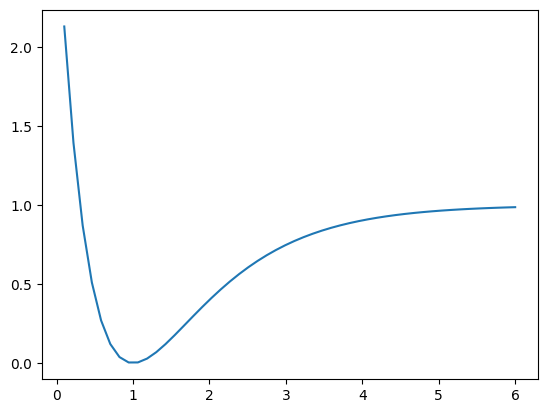

In [ ]:
import matplotlib.pyplot as plt

xs = np.linspace(0.1, 6)
ys = morse_potential(xs)

plt.plot(xs, ys)
plt.show()

## Exercise 03

Write a function to generate `n` uniformly random data points (positions and their functional values) within that domain: `generate_dataset(n: int) -> tuple[np.ndarray, np.ndarray]`. We will use this for the training data and for the test data.

In [ ]:
def generate_dataset(n: int) -> tuple[np.ndarray, np.ndarray]:
  xs = np.random.uniform(0.1, 6, n)
  ys = morse_potential(xs)

  return (xs, ys)

## Exercise 04

Implement nearest neighbor prediction at `position` by hand (without `scikit-learn`): `predict_nearest_neighbor(position: float, training_xs: np.ndarray, training_ys: np.ndarray) -> float`. Plot the results together with the correct function.

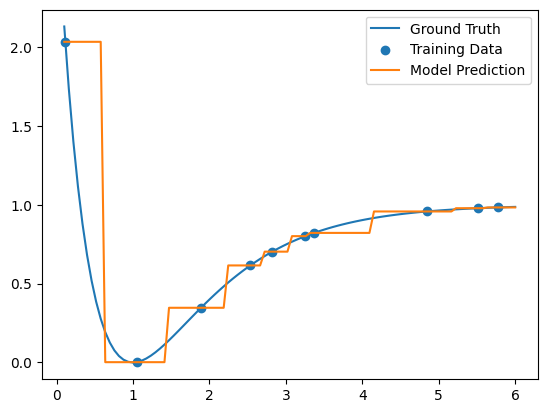

In [ ]:
def predict_nearest_neighbor(position: float, training_xs: np.ndarray, training_ys: np.ndarray) -> float:
  distances = abs(position - training_xs)
  nearest_neighbor_index = np.argmin(distances)

  return training_ys[nearest_neighbor_index]

training_xs, training_ys = generate_dataset(10)

xs = np.linspace(0.1, 6, 100)
ys = morse_potential(xs)

plt.plot(xs, ys, label = 'Ground Truth')
plt.scatter(training_xs, training_ys, label = 'Training Data')
plt.plot(xs, [predict_nearest_neighbor(x, training_xs, training_ys) for x in xs], label = 'Model Prediction')
plt.legend()
plt.show()

## Exercise 05

Do the same using `scikit-learn` (will be first introduced in class).

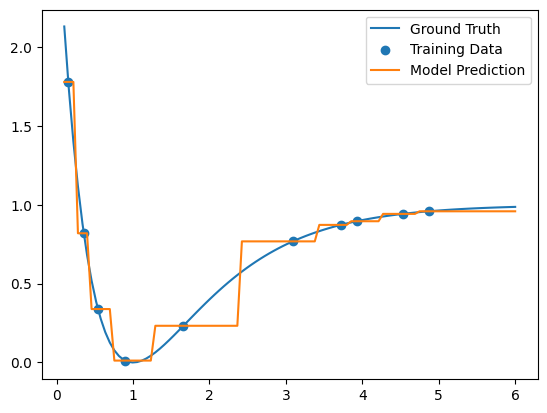

In [ ]:
from sklearn import neighbors

training_xs, training_ys = generate_dataset(10)

xs = np.linspace(0.1, 6, 100)
ys = morse_potential(xs)

knn = neighbors.KNeighborsRegressor(n_neighbors = 1)
X, y = training_xs[:, np.newaxis], training_ys
knn.fit(X, y)

Xprime = xs[:, np.newaxis]
yprime = knn.predict(Xprime)

plt.plot(xs, ys, label = 'Ground Truth')
plt.scatter(training_xs, training_ys, label = 'Training Data')
plt.plot(xs, yprime, label = 'Model Prediction')
plt.legend()
plt.show()